In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,0.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
1113,female,group E,NaN,free/reduced,none,57.0,58.0,57.0
1114,male,group D,some college,standard,completed,NaN,81.0,85.0
1115,male,group D,some high school,standard,completed,77.0,NaN,69.0
1116,male,group C,master's degree,free/reduced,completed,72.0,66.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1118 non-null   object 
 1   race/ethnicity               1117 non-null   object 
 2   parental level of education  1093 non-null   object 
 3   lunch                        1118 non-null   object 
 4   test preparation course      1118 non-null   object 
 5   math score                   1065 non-null   float64
 6   reading score                1056 non-null   float64
 7   writing score                1084 non-null   float64
dtypes: float64(3), object(5)
memory usage: 70.0+ KB


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1118,2,female,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1117,5,group C,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1093,6,associate's degree,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1118,2,standard,703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1118,2,none,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1065.0,NaN,NaN,NaN,66.117371,15.265579,0.0,57.0,66.0,76.0,159.0
reading score,1056.0,NaN,NaN,NaN,68.871212,14.845699,0.0,59.0,70.0,79.0,100.0
writing score,1084.0,NaN,NaN,NaN,68.366236,16.468375,10.0,57.0,69.0,79.0,263.0


In [10]:
df.duplicated().sum()

np.int64(31)

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

In [ ]:
Добавьте столбец Sum с суммой всех баллов

In [16]:
df.loc[:,'parental level of education'] = df['parental level of education'].fillna(df['parental level of education'].mode().iloc[0])

In [17]:
df.loc[:,'Sum'] = df['math score'] + df['reading score'] + df['writing score']
df['Sum']

0       146.0
1       247.0
2       278.0
3       148.0
4       229.0
        ...  
1113    172.0
1114    232.0
1115      NaN
1116      NaN
1117      NaN
Name: Sum, Length: 1087, dtype: float64

In [18]:
df.loc[:,'math score'] = df['math score'].fillna(df['math score'].median())

In [20]:
df.loc[:,'reading score'] = df['reading score'].fillna(df['reading score'].median())
df.loc[:,'writing score'] = df['writing score'].fillna(df['writing score'].median())

In [21]:
df.loc[:,'race/ethnicity'] = df['race/ethnicity'].fillna(df['race/ethnicity'].mode().iloc[0])

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1087,2,female,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1087,5,group C,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1087,6,associate's degree,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1087,2,standard,680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1087,2,none,693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1087.0,NaN,NaN,NaN,66.054278,14.986298,0.0,57.0,66.0,76.0,159.0
reading score,1087.0,NaN,NaN,NaN,68.983441,14.52006,0.0,60.0,70.0,78.0,100.0
writing score,1087.0,NaN,NaN,NaN,68.302668,16.272241,10.0,58.0,69.0,79.0,263.0
Sum,1001.0,NaN,NaN,NaN,203.327672,43.115479,27.0,175.0,205.0,233.0,381.0


In [ ]:
Выполните одномерный анализ всех столбцов, включая добавленный

In [23]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Variables:
['math score', 'reading score', 'writing score', 'Sum']


math score


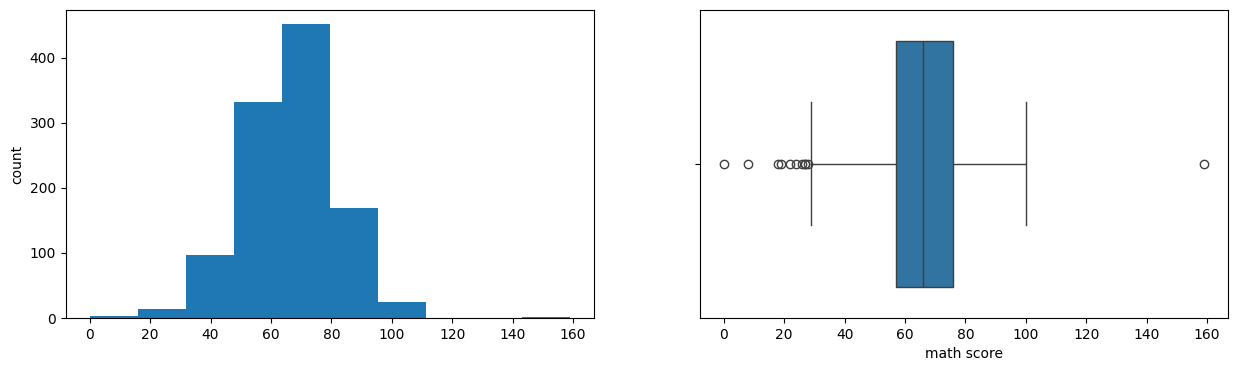

reading score


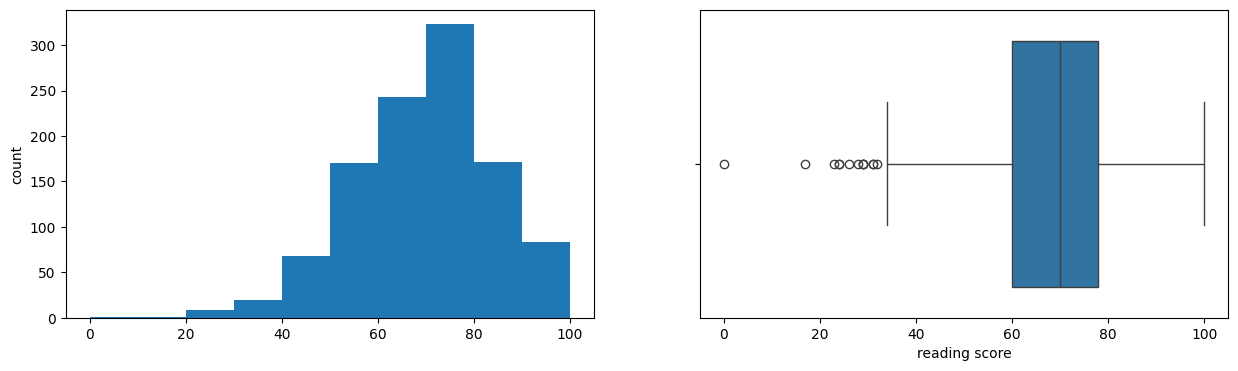

writing score


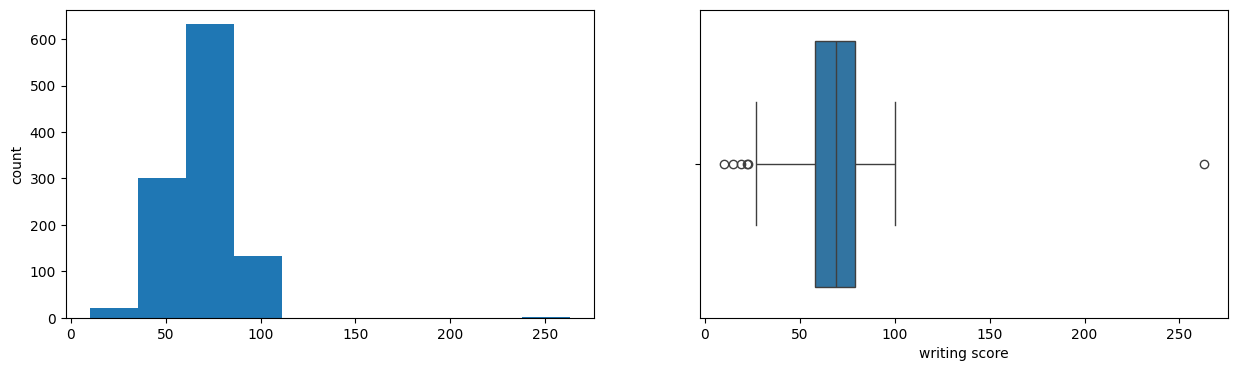

Sum


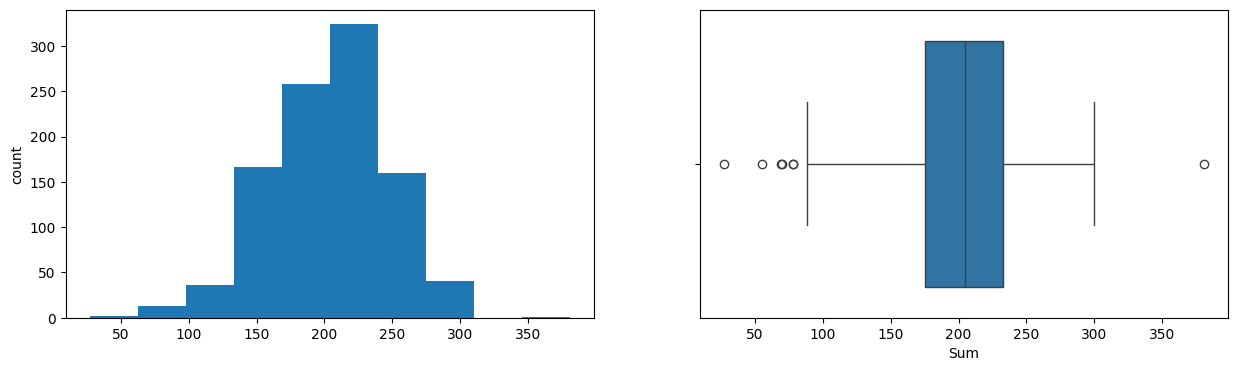

In [26]:
for col in num_cols:
 print(col)
 plt.figure(figsize = (15, 4))
 plt.subplot(1, 2, 1)
 df[col].hist(grid=False)
 plt.ylabel('count')
 plt.subplot(1, 2, 2)
 sns.boxplot(x=df[col])
 plt.show()

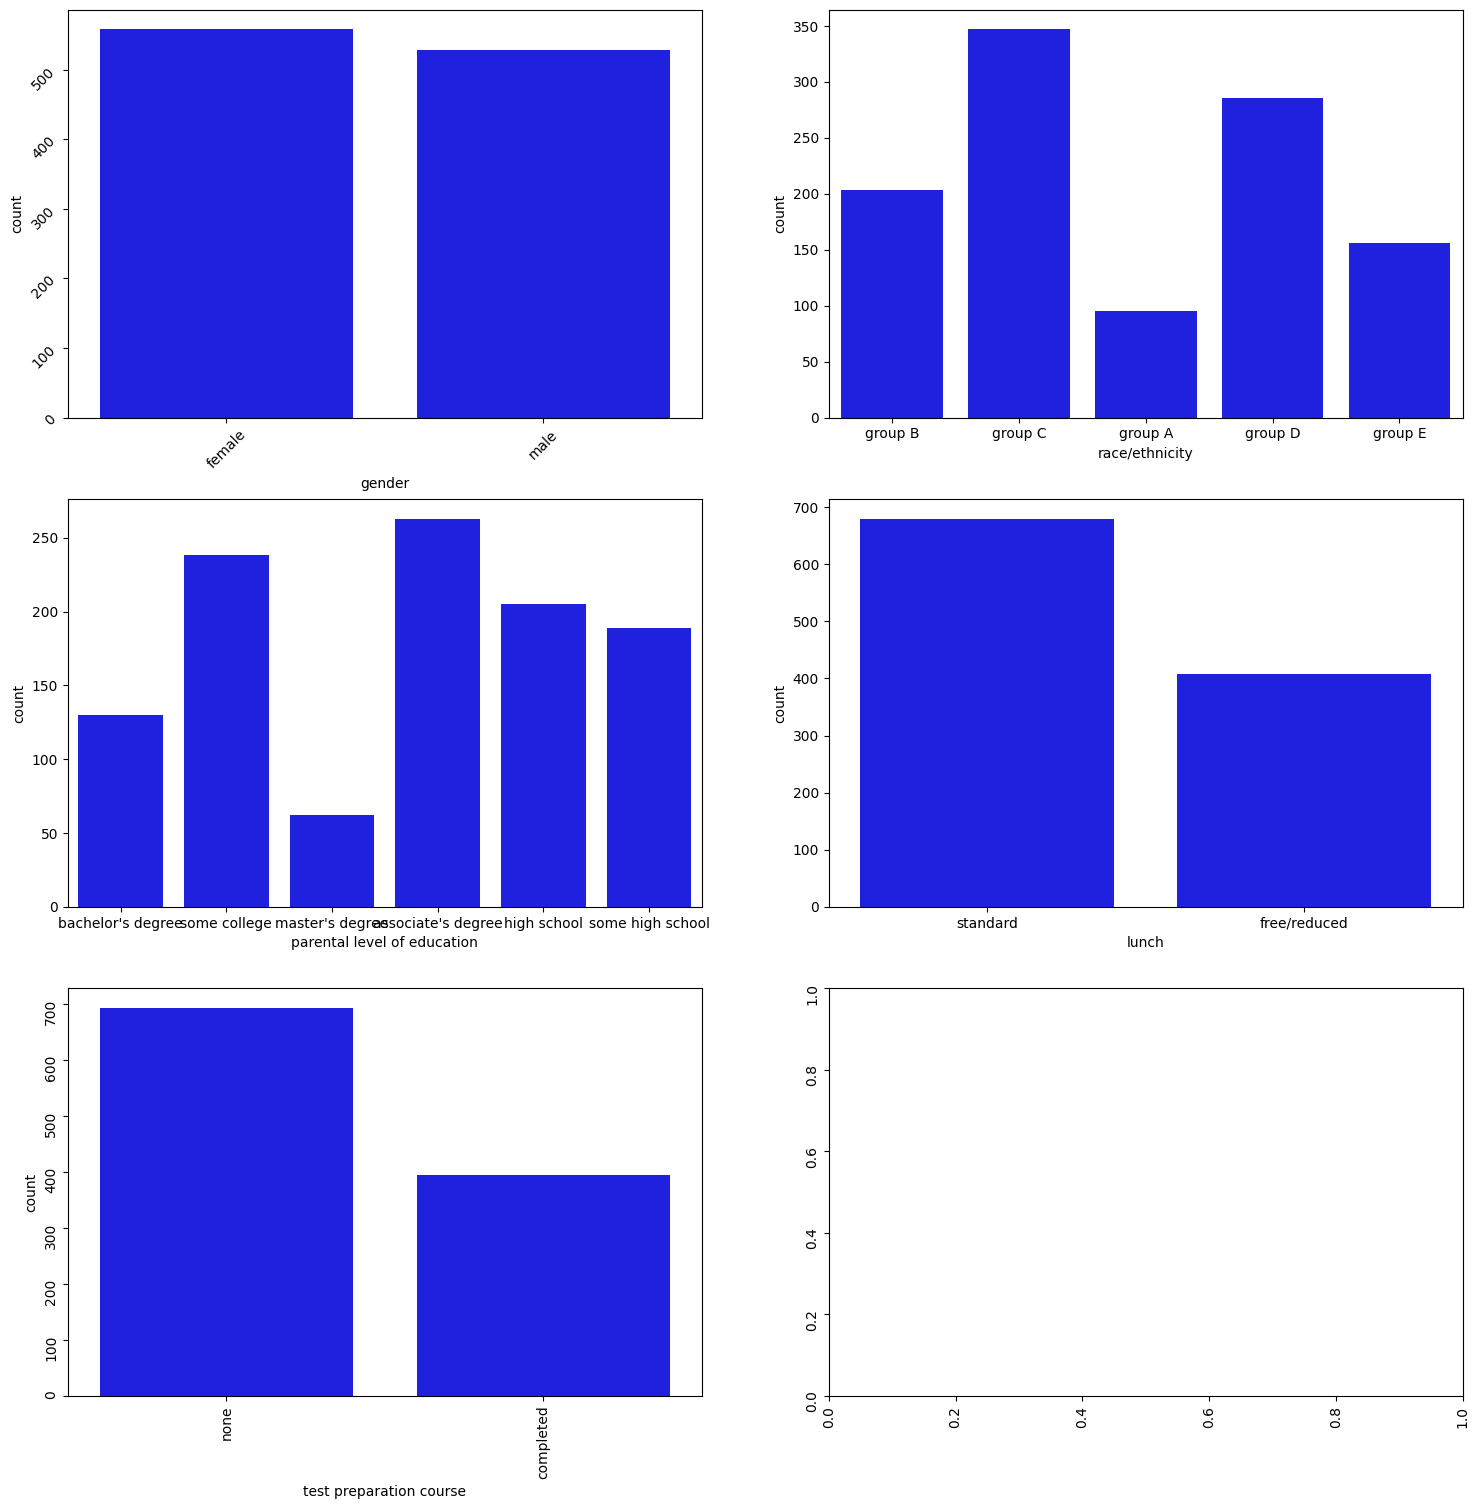

In [27]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
for i in range(len(cat_cols)):
 sns.countplot(ax = axes[i//2, i%2], x = cat_cols[i], data = df, color = 'blue')
axes[0][0].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)
plt.show()

In [ ]:
Выполните двумерный анализ влияния каждого фактора на столбец Sum

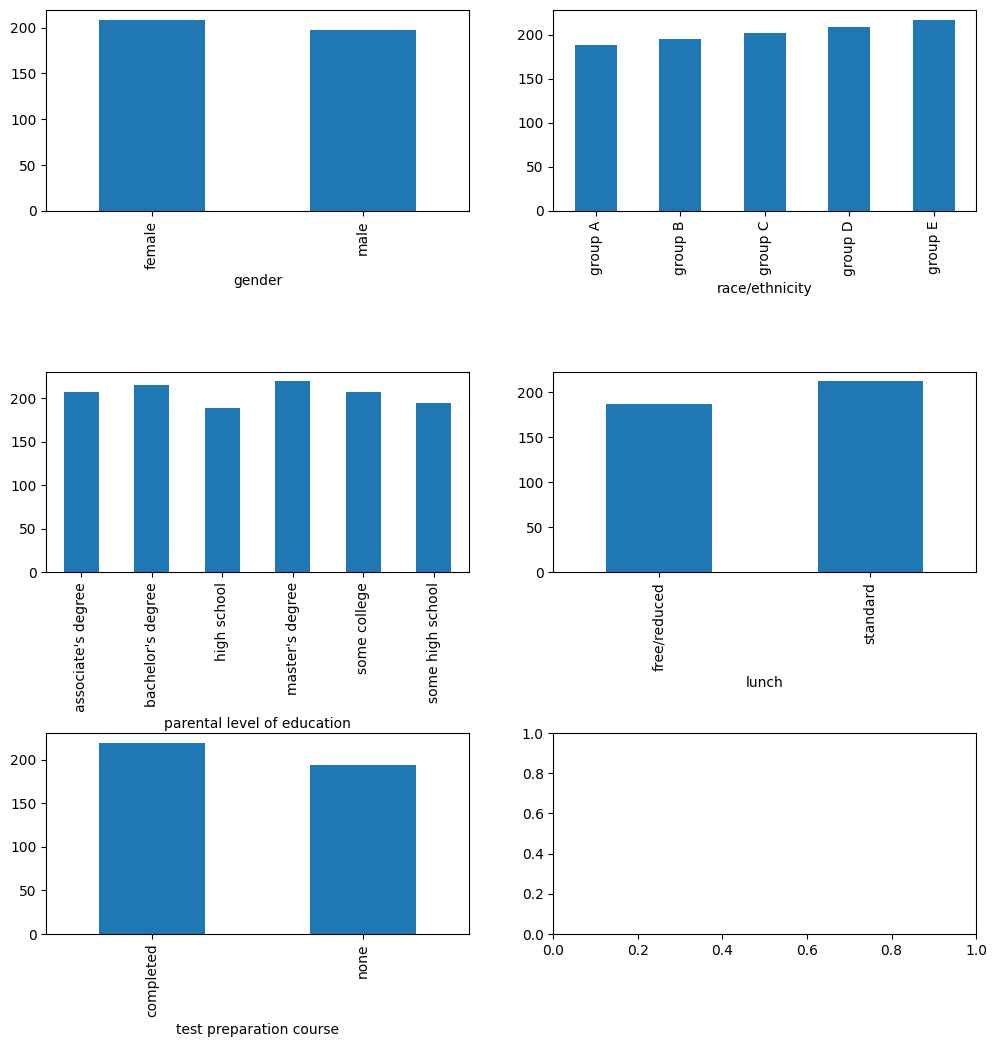

In [29]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 12))
for i in range(len(cat_cols)):
 df.groupby(cat_cols[i])['Sum'].mean().\
 head(20).plot.bar(ax=axarr[i//2][i%2]) # делим на 2 потому что 2 колонки
plt.subplots_adjust(hspace=0.8)
plt.show()

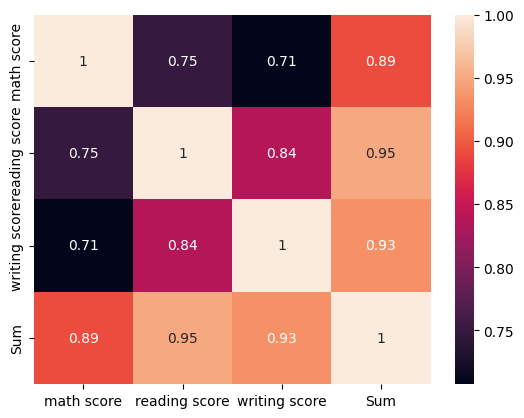

In [30]:
# Построение тепловой карты
plt.figure()
sns.heatmap(df[['math score', 'reading score', 'writing score', 'Sum']].corr(), annot = True)
plt.show()